# Central limit theorem 
> Visual proof of the central limit theorem

- toc:true
- badges: true
- comments: true
- author: Pushkar G. Ghanekar
- categories: [python, data-analysis]

## What is central limit theorem? 

The distribution of the sum of independent samples consisting of `n` points drawn from an arbitrary distribution approach a normal distribution as `n` increases.

If the distribution of the values has a mean and standard deviation, the distribution of sum is approximately given by $ N(n\mu, n\sigma^2)$


Some points to keep in mind: 
- The values are to be drawn independently
- The values have to come from same distribution 
- The underlying distribution should have finite mean and variance 
- The rate convergence to the normal distribution depends on the skewness of the parent distribution. 


We start with some crazy distribution that has got nothing to do with a normal distribution. Sample points from that distribution with some arbitrary sample size, following which we plot the sample mean (or sample sum) on a frequency table -- repeat this lot of times (tending to infinity) we end up getting a normal distribution of sample means! 

**The Central Limit Theorem explains the prevalence of normal distributions in the natural world.** That way we can take advantage of this and use methods developed for normal distribution like confidence intervals.

* [Khan Academy video explaining this](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/central-limit-theorem)

* [Statas LibreTexts blog entry](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Statistical_Thinking_for_the_21st_Century_(Poldrack)/12%3A_Sampling/12.04%3A_The_Central_Limit_Theorem)

Below a simple python experiment to show this in action.

In [13]:
import random as rand 
import numpy as np 
from scipy import stats 

# High DPI rendering for mac
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set()
#sns.color_palette('deep')

plot_params = {
'font.size' : 22,
'axes.titlesize' : 24,
'axes.labelsize' : 20,
'axes.labelweight' : 'bold',
#'lines.linewidth' : 3,
#'lines.markersize' : 10,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,
}
 
plt.rcParams.update(plot_params)

sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [15]:
from numpy.random import default_rng
rng = default_rng(42)

### 1. Discrete distribution 

For this case let's assume we have a dice which is unfair and does not ever land on 3 and 5, and lands more on 2 and 6. We can build this skewed probability into the dice using the weights.

In [16]:
dice = np.arange(1,7) # Dice numbers possible 
probabilities = [0.2, 0.3, 0.0, 0.2, 0.0, 0.3] #Weighted probabilites for the numbers 

Define a function to draw samples from the dice and calculate the mean. 

In [19]:
# Draw sample size = n, take the mean and plot the frequencies 
def sample_draw_mean(_trials=1000, _sample_size=1):
    sample_mean_trials = []
    # Sample a number from the distribution equal to trials
    for i in range(_trials):
        sample = rng.choice(dice, size=_sample_size, p=probabilities, replace=True)
        sample_mean_trials.append(np.mean(sample))
    return sample_mean_trials

Drawing `sample_size`=1 from the distribution multiple times, i.e. equal to `num_of_trials` variable

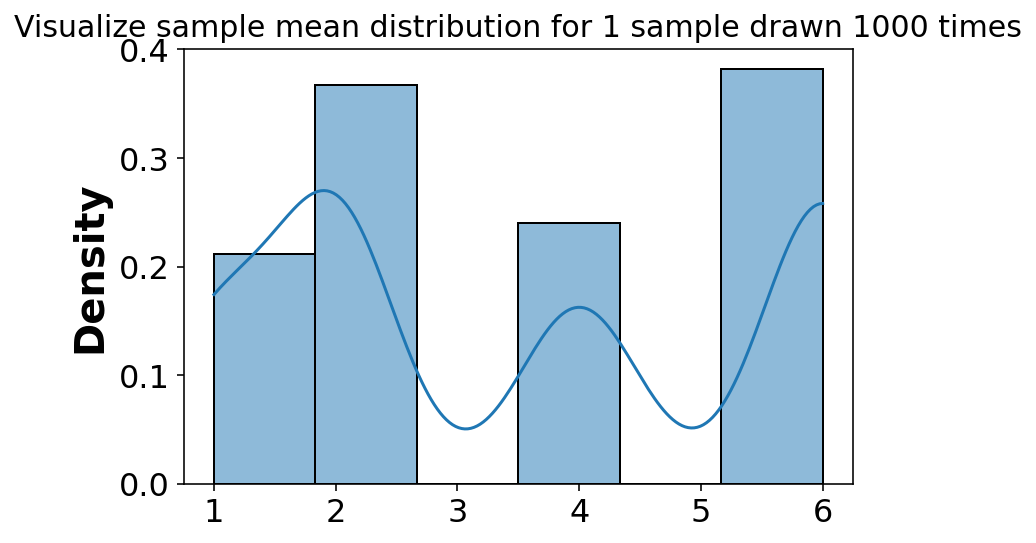

In [28]:
num_of_trials = 1000
sample_size = 1
sns.histplot(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size), bins=len(dice), stat='density', kde=True);
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);

For sample size 1 it is seen that the frequency of rolling numbers of the die relate to the probability we have determined above. However we can start to define samples from that distribution wherein, instead of single number we draw for example 4 numbers. We do this multiple times and plot the histogram of the mean. 

#### Plotting sampling distribution of sample mean

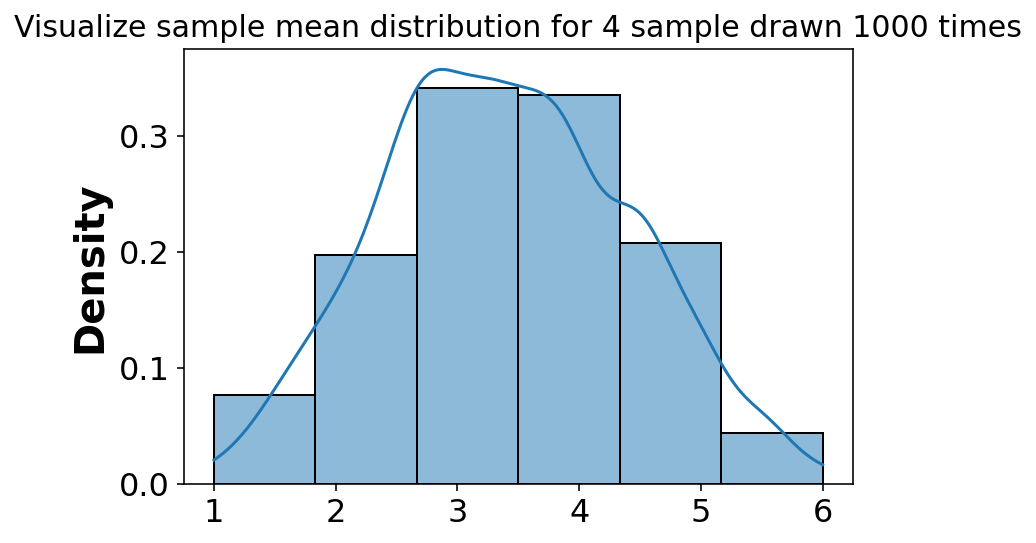

In [29]:
num_of_trials = 1000
sample_size = 4
sns.histplot(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size), bins=len(dice), stat='density', kde=True);
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);

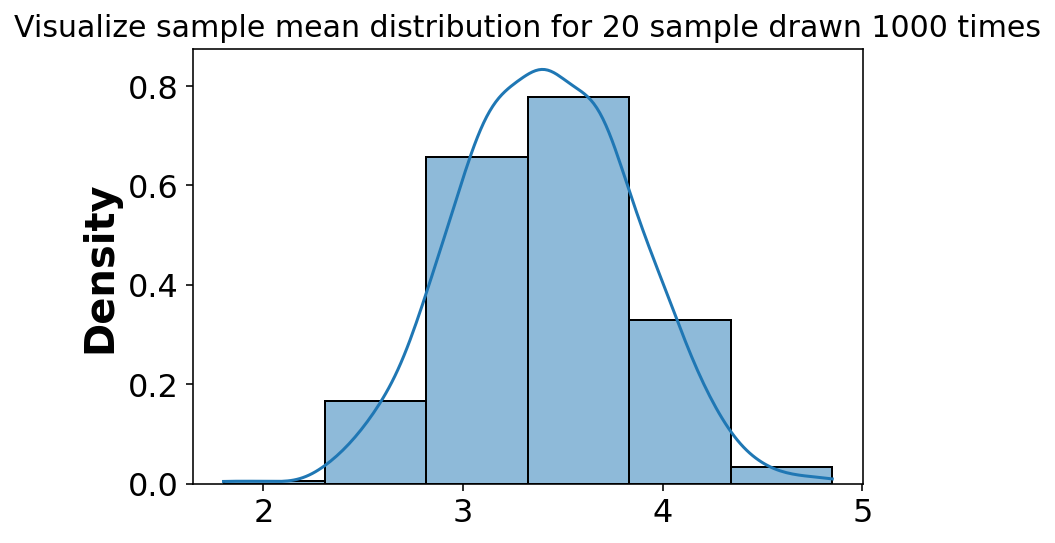

In [30]:
num_of_trials = 1000
sample_size = 20
sns.histplot(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size), bins=len(dice), stat='density', kde=True);
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);

As we keep plotting the frequency distribution for the sample mean it starts to approach the normal distribution!

In [32]:
def normal_distribution(x, mean=0, sigma=1):
    out = (1/np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-1/2 * ((x - mean)/sigma)**2)
    return(out)

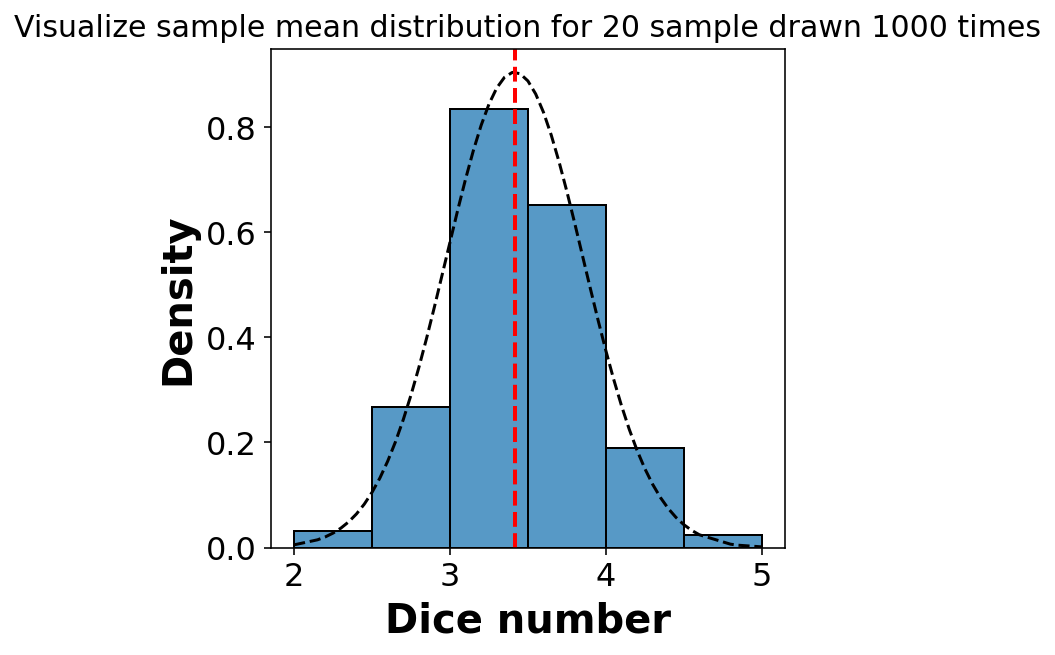

In [41]:
num_of_trials = 1000
sample_size = 20

fig, ax = plt.subplots(1,1, figsize=(5,5))
sample_means = np.sort(sample_draw_mean(_trials=num_of_trials, _sample_size=sample_size))
# Plot histogram density
sns.histplot(sample_means, bins=len(dice), stat='density', kde=False, ax=ax)
# Plot normal distribution
ax.plot(sample_means, normal_distribution(sample_means, np.mean(sample_means), np.std(sample_means)), color='black', linestyle='--', label='Normal Distribution')
# Plot sample mean
ax.axvline(np.mean(sample_means), color='red', linestyle='--', linewidth=2.0, label='Sample Mean')
ax.set_xlabel('Dice number')
plt.title('Visualize sample mean distribution for {} sample drawn {} times'.format(sample_size, num_of_trials), fontsize=15);
plt.tight_layout()

### 2. Continuous distibution

In [42]:
# Define an exponential distribution
beta = 5.0 
num_of_trials = 1000
sample_size_list = [1, 10, 100, 500]

In [43]:
def generate_mean_samples(_beta, _iter, _sample_size):
    samples_mean = []
    for i in range(_iter):
        sample_numbers = np.random.exponential(_beta, _sample_size)
        samples_mean.append(np.mean(sample_numbers))
    return(samples_mean)

In [44]:
sample_plot_list = []
for n in sample_size_list:
    sample_plot_list.append((n, generate_mean_samples(beta, num_of_trials, n)))

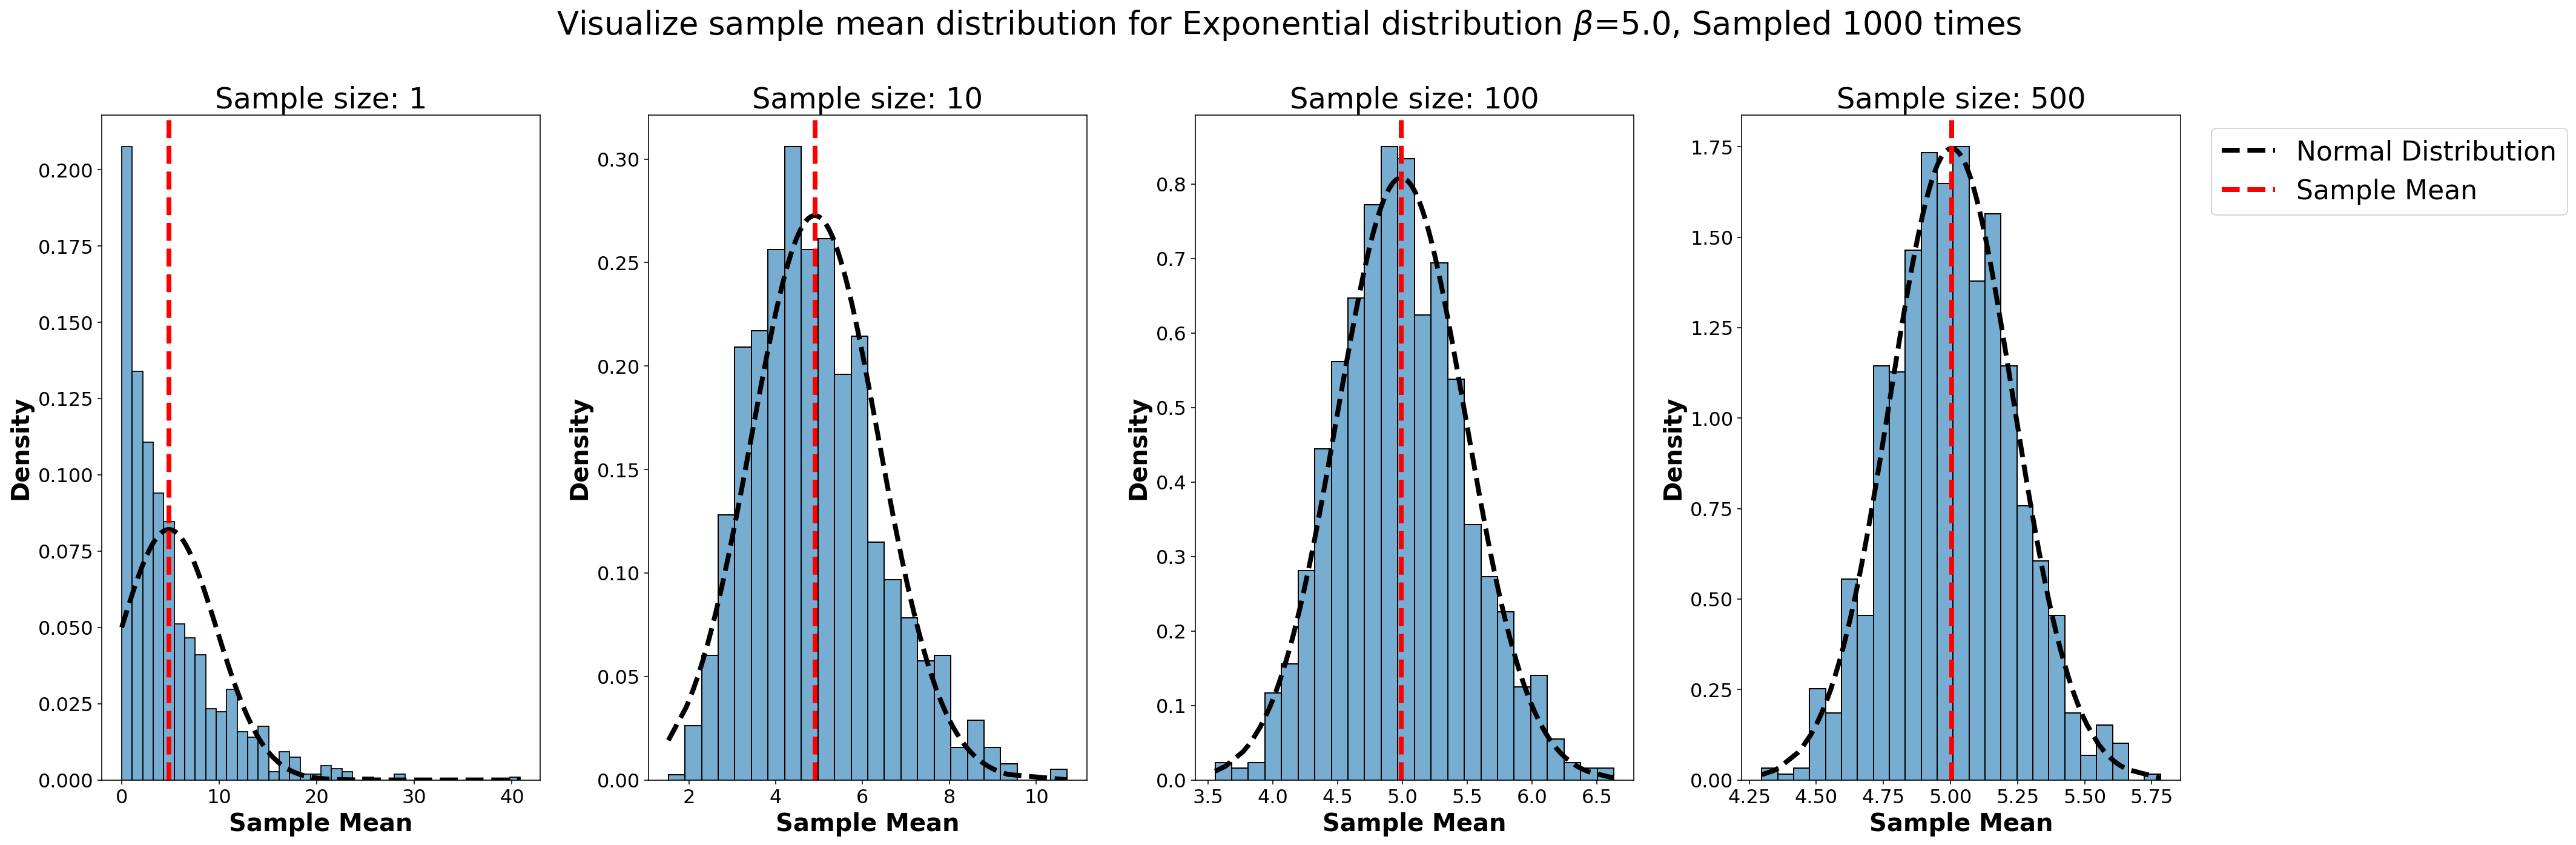

In [45]:
fig, ax = plt.subplots(1, len(sample_size_list), figsize=(30,10))
ax = ax.flatten()
for i, entry in enumerate(sample_plot_list): 
    sns.histplot(entry[1], stat='density', alpha=0.6, kde=False, ax=ax[i])
    ax[i].set_title('Sample size: {}'.format(entry[0]))
    sample_mean = np.mean(entry[1])
    sample_std = np.std(entry[1])
    normal_x = np.sort(entry[1])
    # Plot normal distribution 
    ax[i].plot(normal_x, normal_distribution(normal_x,sample_mean,sample_std), linewidth=4.0, color='black', linestyle='--', label='Normal Distribution')
    
    # Sample mean
    ax[i].axvline(sample_mean, color='red', linestyle='--', linewidth=4.0, label='Sample Mean')
    ax[i].set_xlabel('Sample Mean')
plt.suptitle(r'Visualize sample mean distribution for Exponential distribution $\beta$={}, Sampled {} times'.format(beta, num_of_trials));
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()